# Feature Scaling and Learning Rate (Multi-variable)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent
from lab_utils_multi import norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [7]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

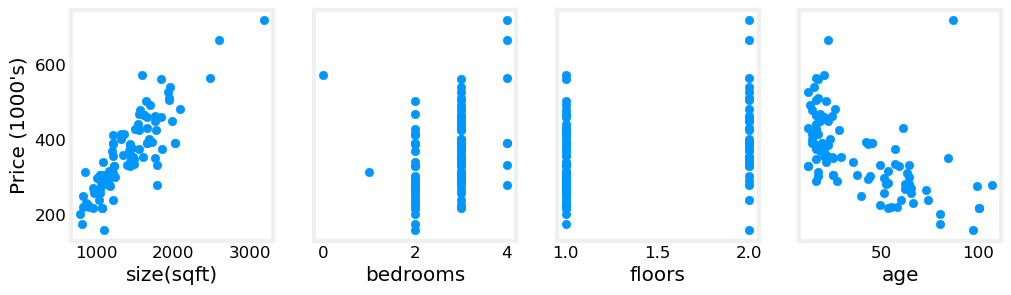

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

## Gradient Descenet With Multiple Variables

Gradient descent for multiple variables:

$$\begin{align*}
\text{repeat}&\text{ until convergence:} \; \lbrace\newline\;
& w_j := w_j - \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1} \; & \text{for j = 0..n-1}\newline
&b\ \:= b - \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}
\newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_{j}$, $b$ are updated *simultaneously* and where

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\

\frac{\partial J(\mathbf{w},b)}{\partial b} &= \frac{1}{m}\sum\limits_{ i = 0 }^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}

\end{align}
$$

* m is the number of training examples in the data set

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## Learning Rate
The learning rate $\alpha$ controls the size of the update to the parameters. See equation (1) above. It is shared by all the parameters.

### $\alpha$ = 9.9e-7

In [10]:
# set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha=9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.31055e+04  5.4e-01  9.9e-04  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.22207e+05 -8.0e-02 -1.6e-04 -9.3e-05 -3.2e-03 -4.4e-05  6.3e+05  1.2e+03  6.1e+02  1.6e+04  4.1e+02
        2 1.60562e+05  6.4e-01  1.1e-03  5.8e-04  1.3e-02  4.3e-04 -7.2e+05 -1.3e+03 -6.8e+02 -1.7e+04 -4.8e+02
        3 2.11110e+05 -1.9e-01 -3.7e-04 -2.1e-04 -7.0e-03 -1.0e-04  8.3e+05  1.5e+03  8.0e+02  2.0e+04  5.4e+02
        4 2.77730e+05  7.6e-01  1.4e-03  6.8e-04  1.5e-02  5.2e-04 -9.5e+05 -1.7e+03 -9.0e+02 -2.2e+04 -6.3e+02
        5 3.65531e+05 -3.3e-01 -6.4e-04 -3.6e-04 -1.2e-02 -1.9e-04  1.1e+06  2.0e+03  1.1e+03  2.7e+04  7.1e+02
        6 4.81246e+05  9.2e-01  1.6e-03  8.2e-04  1.7e-02  6.3e-04 -1.3e+06 -2.3e+03 -1.2e+03 -2.9e+04 -

It appears that learning rate is too high. The solution does not converge. Cost is *increasing* rather than decreasing.

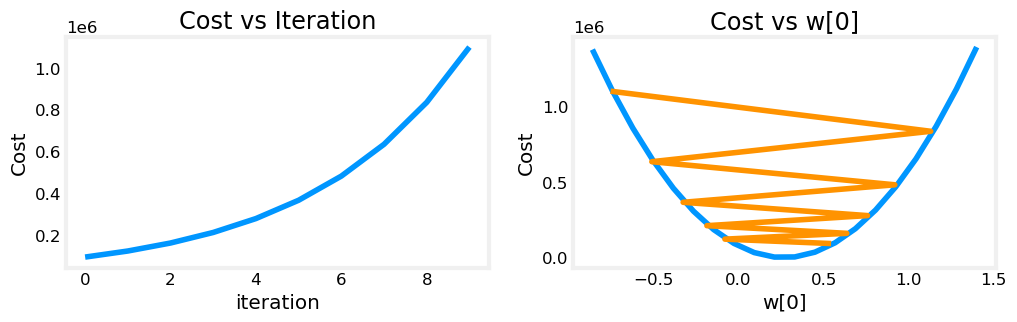

In [11]:
plot_cost_i_w(X_train, y_train, hist)

### $\alpha$ = 9e-7

In [12]:
# set alpha to 9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha= 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.46137e+04  4.9e-01  9.0e-04  4.6e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 5.87949e+04  2.3e-02  3.1e-05  7.5e-06 -6.2e-04  2.3e-05  5.2e+05  9.7e+02  5.1e+02  1.3e+04  3.4e+02
        2 5.35131e+04  4.7e-01  8.5e-04  4.3e-04  9.5e-03  3.2e-04 -5.0e+05 -9.1e+02 -4.7e+02 -1.1e+04 -3.3e+02
        3 4.87187e+04  4.5e-02  5.9e-05  1.3e-05 -1.3e-03  4.5e-05  4.7e+05  8.8e+02  4.6e+02  1.2e+04  3.1e+02
        4 4.43668e+04  4.5e-01  8.0e-04  3.9e-04  7.9e-03  3.1e-04 -4.5e+05 -8.2e+02 -4.2e+02 -1.0e+04 -3.0e+02
        5 4.04165e+04  6.4e-02  8.2e-05  1.7e-05 -2.0e-03  6.5e-05  4.3e+05  8.0e+02  4.2e+02  1.1e+04  2.8e+02
        6 3.68307e+04  4.3e-01  7.5e-04  3.6e-04  6.2e-03  3.1e-04 -4.1e+05 -7.5e+02 -3.8e+02 -9.2e+03 -

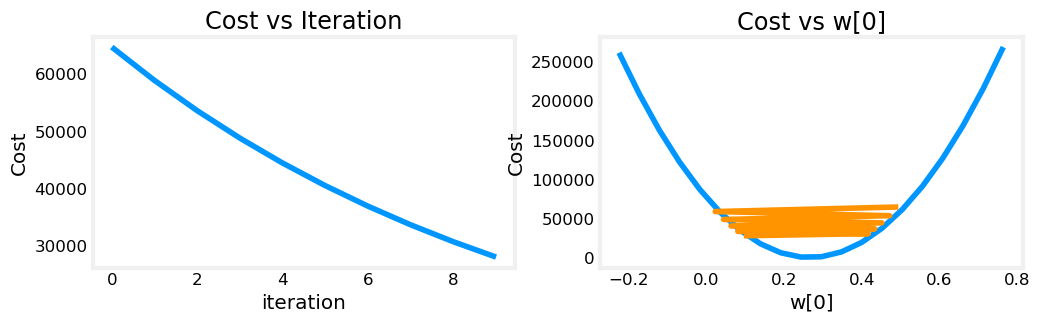

In [13]:
plot_cost_i_w(X_train, y_train, hist)

### $\alpha$ = 1e-7

In [14]:
# set alpha to 1e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha=1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.41544e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76797e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.8e+02 -4.0e+02 -9.6e+03 -2.8e+02
        2 1.75784e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.4e+03 -2.2e+02
        3 1.13850e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.58758e+03  1.8e-01  3.2e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.3e+03 -1.4e+02
        5 5.25923e+03  1.9e-01  3.5e-04  1.8e-04  4.3e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.2e+03 -1.1e+02
        6 3.83162e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.3e+02 -1.1e+02 -2.4e+03 -

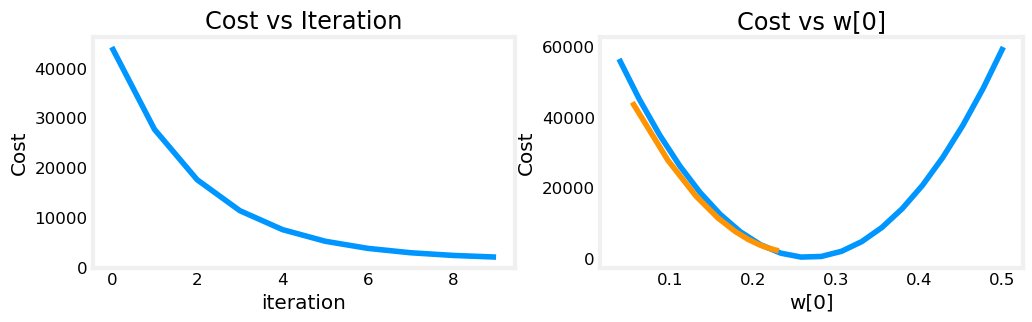

In [15]:
plot_cost_i_w(X_train, y_train, hist)

* With a small enough $\alpha$, $J(\mathbf{w},b)$ should **decrease** on every iteration
* If $\alpha$ is too small, gradient descent takes a lot more iterations to **converge**

## Feature Scaling

The lectures discussed three different techniques:

- Feature scalling, essentially dividing each positive deature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and latter method works for any features.
- Mean normalization: $x_{i} := \frac{x_{i} - \mu_i}{max - min}$
- Z-score normalization which we will explore blow.

### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $\mu_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).

$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2 \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

**Implementation**

In [16]:
def zscore_normalize_features(X):
    """
    computes   X, zscore normalized by column

    Args:
      X (ndarray (m,n))      : input data, m examples, n features
    
    Returns:
      X_norm (ndarray (m,n)) : input normalized by column
      mu (ndarray (n,))      : mean of each feature
      sigma (ndarray (n,))   : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

# check:
# from sklearn.preprocessing import scale
# scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

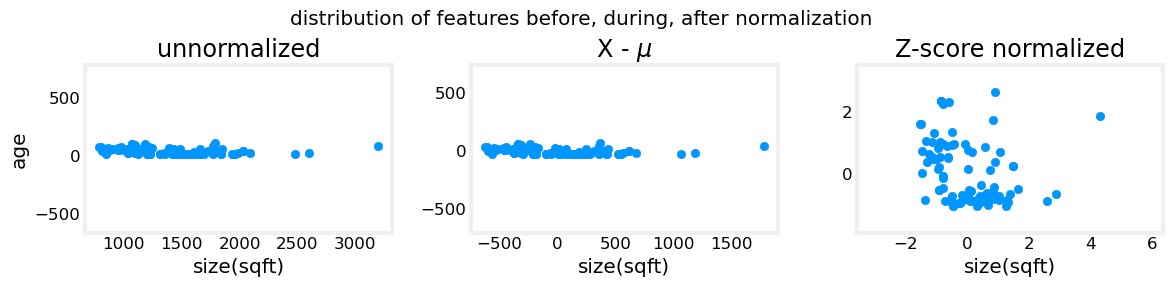

In [17]:
mu     = np.mean(X_train, axis=0)
sigma  = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax = plt.subplots(1, 3, figsize=(12,3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [18]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu    = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

X_mu    = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_sigma = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


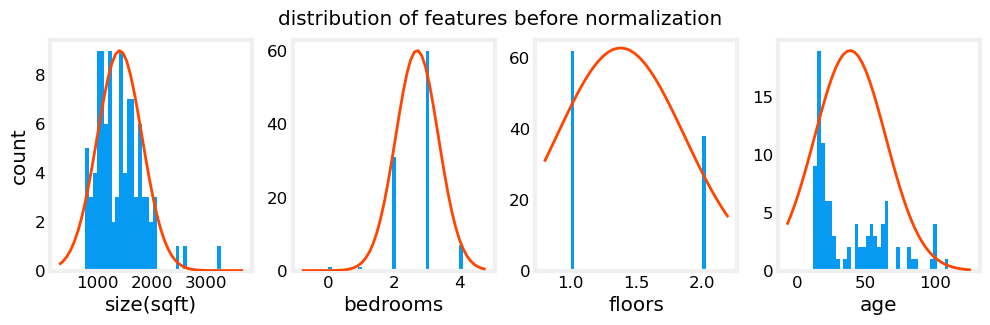

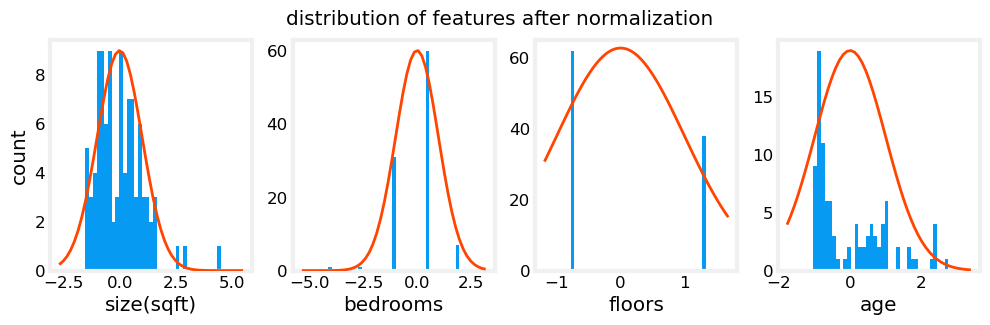

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig, ax=plt.subplots(1, 4, figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

In [20]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.73264e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21728e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.4e-01  4.6e-01  5.4e-01 -1.8e-01 -9.6e-03
      200 2.19714e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.3e-02  1.6e-02  1.8e-02 -6.4e-03 -2.6e-07
      300 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-03  5.7e-04  6.3e-04 -2.2e-04 -6.9e-12
      400 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.9e-05  2.0e-05  2.2e-05 -7.6e-06 -2.3e-13
      500 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.3e-06  6.8e-07  7.5e-07 -2.6e-07 -2.2e-13
      600 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -4.7e-08  2.4e-08  2.6e-08 -9.1e-09 -

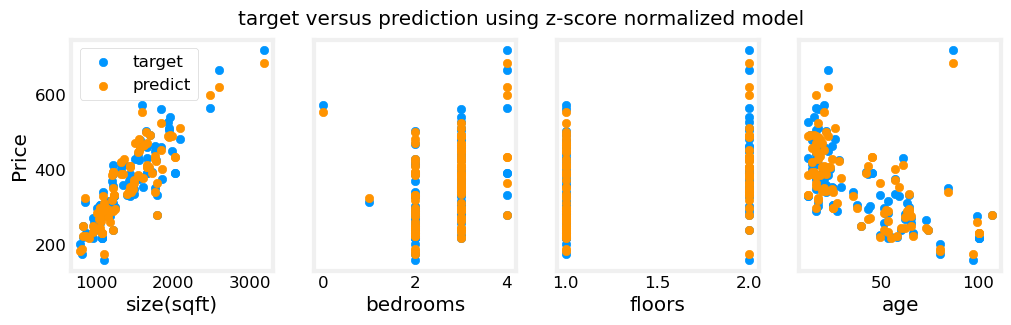

In [22]:
# predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label='predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

- With multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.

In [24]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.52  0.44 -0.78  0.05]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936


**Cost contours**

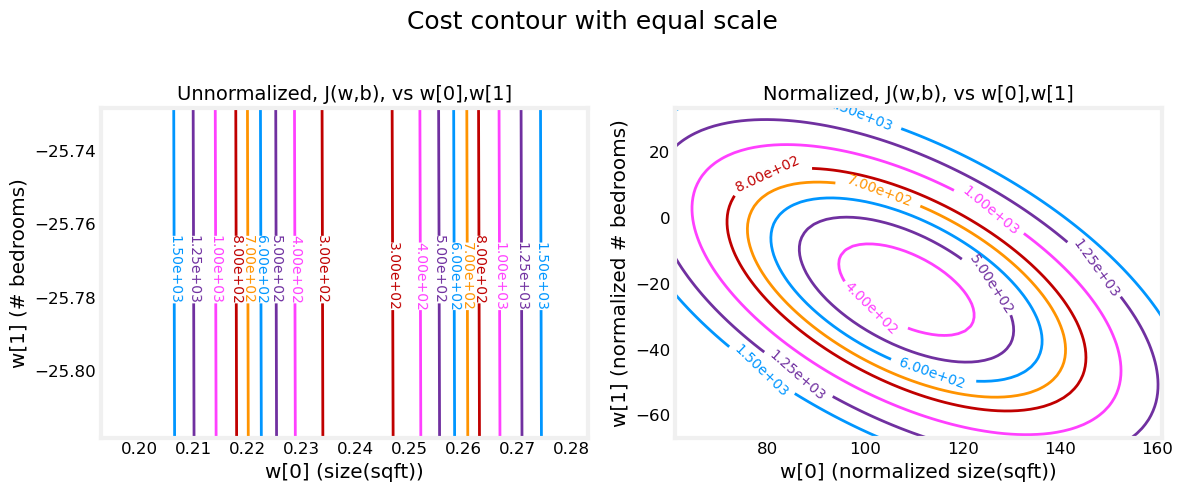

In [25]:
plt_equal_scale(X_train, X_norm, y_train)